# 1. DATA GATHERING

In [1]:
# Importing repositories
import time
import numpy as np
import pandas as pd

# For exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

# For Feature engineering
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer

# For Model Building
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


# For Deployment
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, chi2

# To Ignore Warning from Depricated Functions
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV & storing it to dataframe df.
df = pd.read_csv("binary.csv")

# Copy df to dib to preserve original data.
dib = df.copy()

# Printing information about dataset.
dib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [3]:
# Checking the spread of data.
dib.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# 2. EXPLORATORY DATA ANALYSIS

## 2.1 Univariant Data Analysis

### 2.1.1 Pie Plots

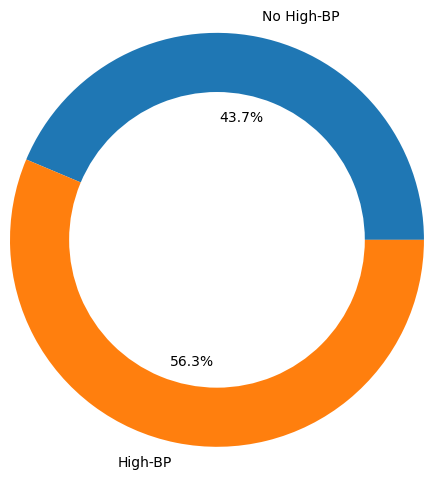

In [4]:
# Storing sum of each categorey in bp.
bp = dib['HighBP'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["No High-BP","High-BP"]

# Creating pie-chart
plt.pie(bp, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

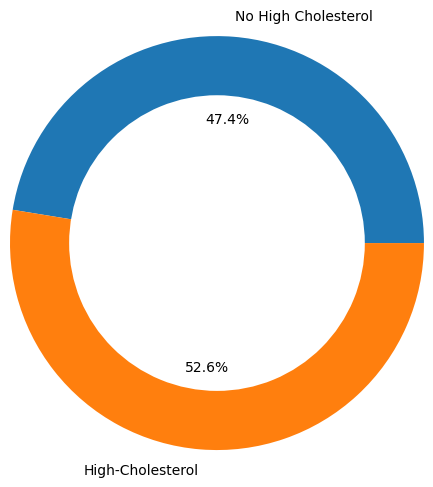

In [5]:
# Storing sum of each categorey in bp.
chol = dib['HighChol'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["No High Cholesterol","High-Cholesterol"]

# Creating pie-chart
plt.pie(chol, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

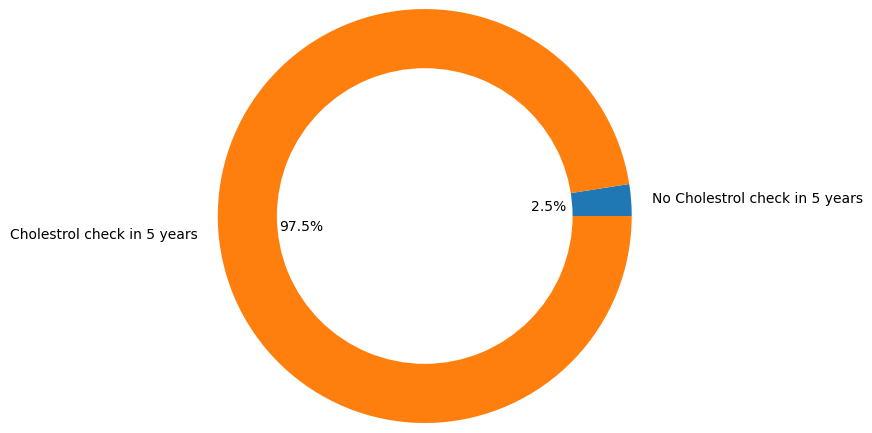

In [6]:
# Storing sum of each categorey in bp.
cholcheck = dib['CholCheck'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["No Cholestrol check in 5 years","Cholestrol check in 5 years"]

# Creating pie-chart
plt.pie(cholcheck, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

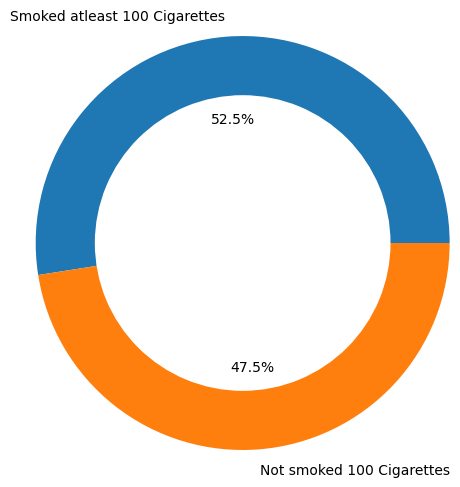

In [7]:
# Storing sum of each categorey in bp.
smoker = dib['Smoker'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["Smoked atleast 100 Cigarettes","Not smoked 100 Cigarettes"]

# Creating pie-chart
plt.pie(smoker, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

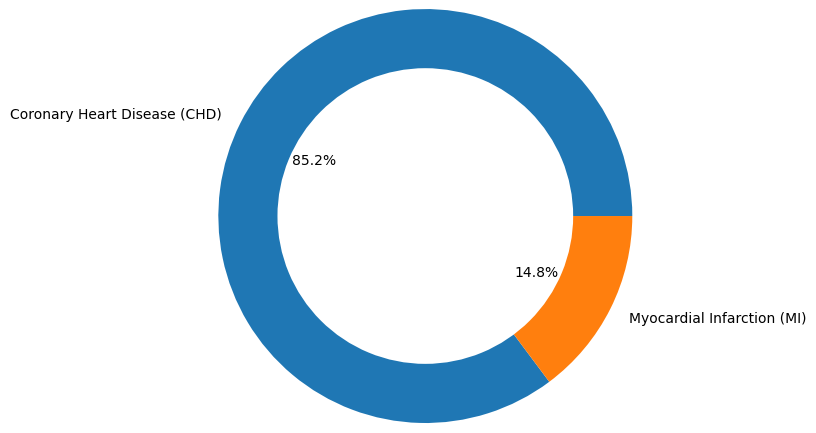

In [8]:
# Storing sum of each categorey in bp.
hda = dib['HeartDiseaseorAttack'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["Coronary Heart Disease (CHD)","Myocardial Infarction (MI)"]

# Creating pie-chart
plt.pie(hda, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

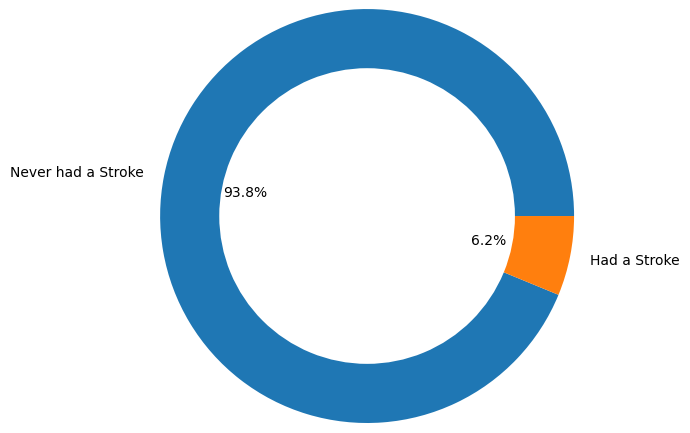

In [9]:
# Storing sum of each categorey in bp.
stroke = dib['Stroke'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["Never had a Stroke","Had a Stroke"]

# Creating pie-chart
plt.pie(stroke, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

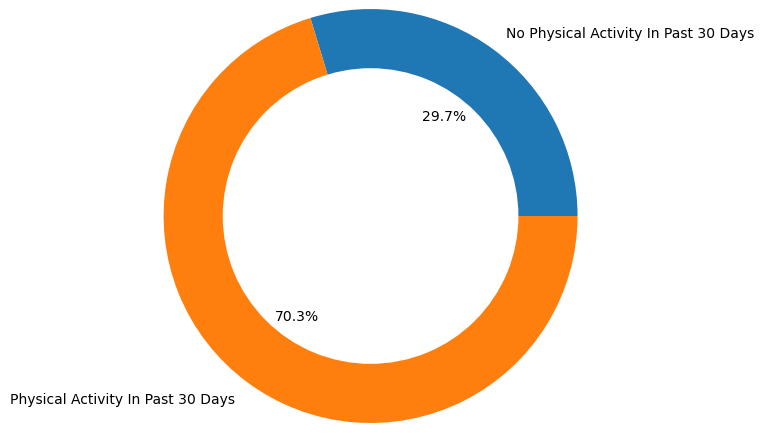

In [10]:
# Storing sum of each categorey in bp.
pyact = dib['PhysActivity'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["No Physical Activity In Past 30 Days ", "Physical Activity In Past 30 Days"]

# Creating pie-chart
plt.pie(pyact, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

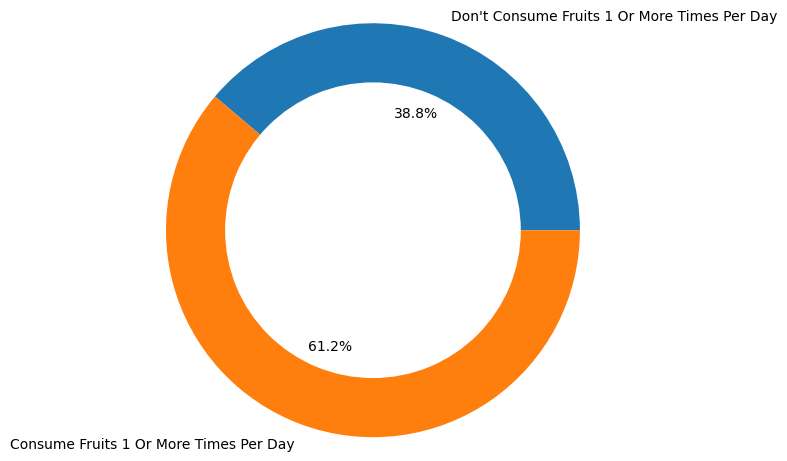

In [11]:
# Storing sum of each categorey in bp.
fruits = dib['Fruits'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["Don't Consume Fruits 1 Or More Times Per Day","Consume Fruits 1 Or More Times Per Day"]

# Creating pie-chart
plt.pie(fruits, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

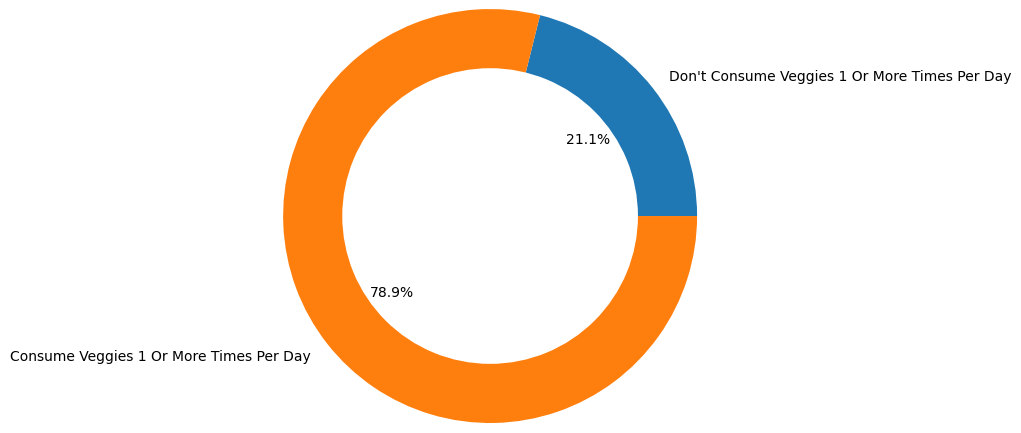

In [12]:
# Storing sum of each categorey in bp.
veggies = dib['Veggies'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["Don't Consume Veggies 1 Or More Times Per Day","Consume Veggies 1 Or More Times Per Day"]

# Creating pie-chart
plt.pie(veggies, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

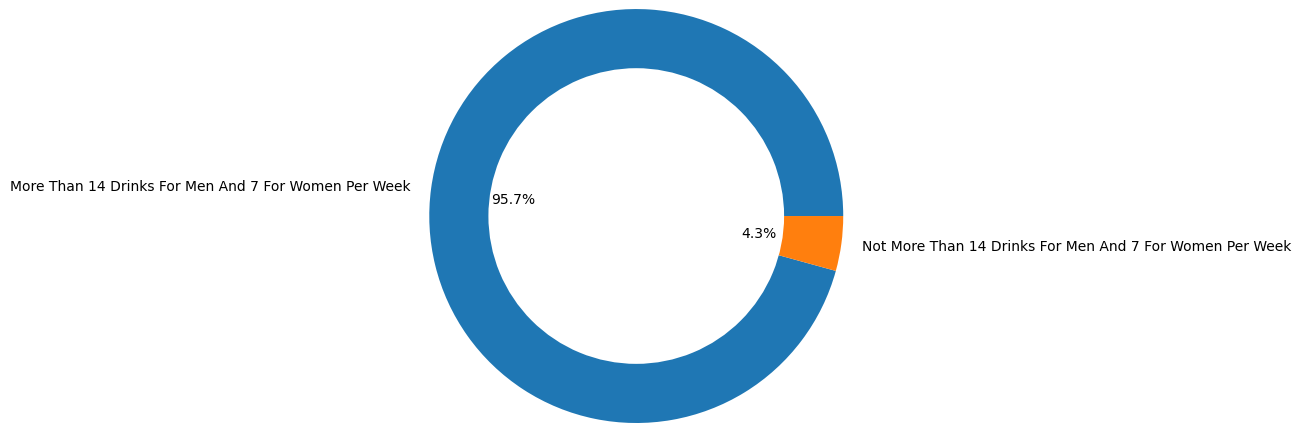

In [13]:
# Storing sum of each categorey in bp.
alchol = dib['HvyAlcoholConsump'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["More Than 14 Drinks For Men And 7 For Women Per Week","Not More Than 14 Drinks For Men And 7 For Women Per Week"]

# Creating pie-chart
plt.pie(alchol, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

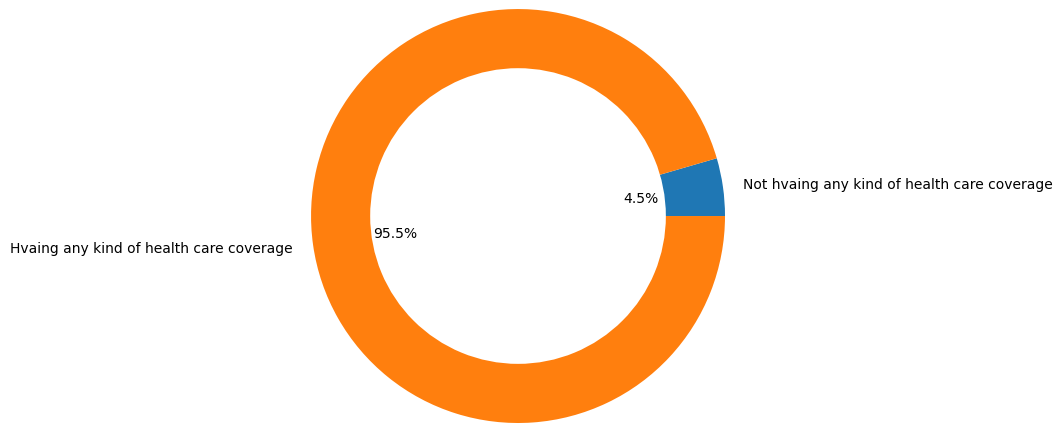

In [14]:
# Storing sum of each categorey in bp.
treatment = dib['AnyHealthcare'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["Not hvaing any kind of health care coverage","Hvaing any kind of health care coverage"]

# Creating pie-chart
plt.pie(treatment, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

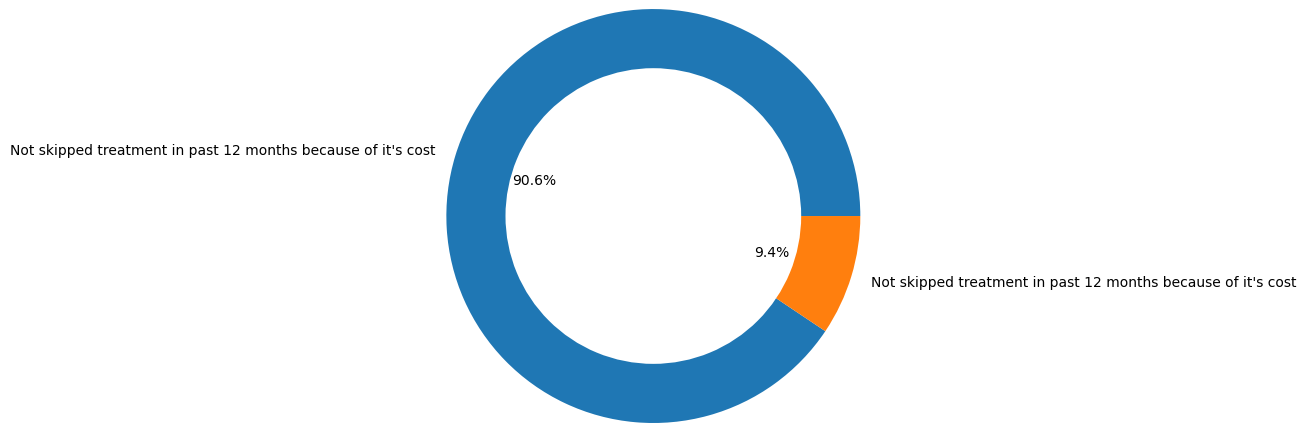

In [15]:
# Storing sum of each categorey in bp.
drcost = dib['NoDocbcCost'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["Not skipped treatment in past 12 months because of it's cost","Not skipped treatment in past 12 months because of it's cost"]

# Creating pie-chart
plt.pie(drcost, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

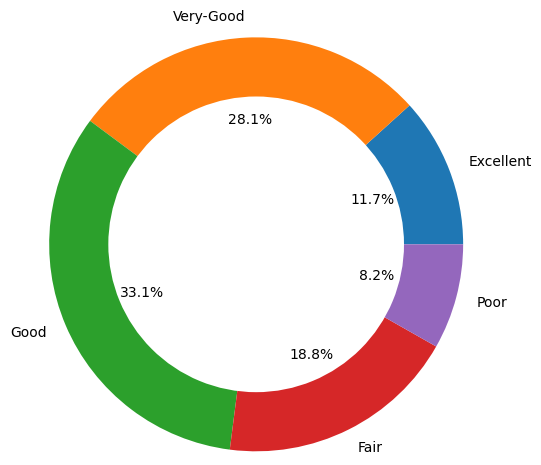

In [16]:
# Storing sum of each categorey in bp.
health = dib['GenHlth'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["Excellent","Very-Good","Good","Fair", "Poor"]

# Creating pie-chart
plt.pie(health, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

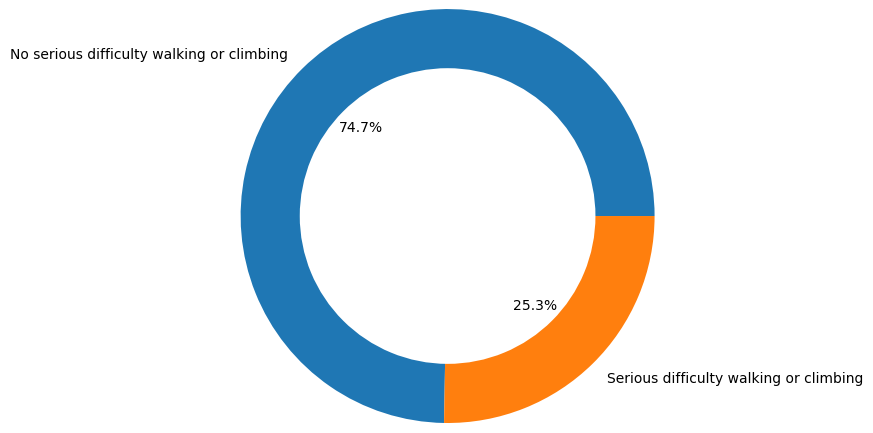

In [17]:
# Storing sum of each categorey in bp.
diffwalk = dib['DiffWalk'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["No serious difficulty walking or climbing","Serious difficulty walking or climbing"]

# Creating pie-chart
plt.pie(diffwalk, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

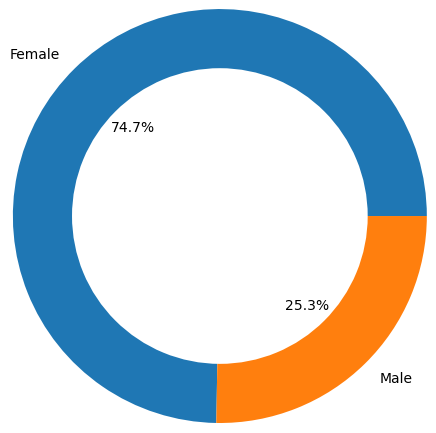

In [18]:
# Storing sum of each categorey in bp.
sex = dib['Sex'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["Female","Male"]

# Creating pie-chart
plt.pie(diffwalk, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

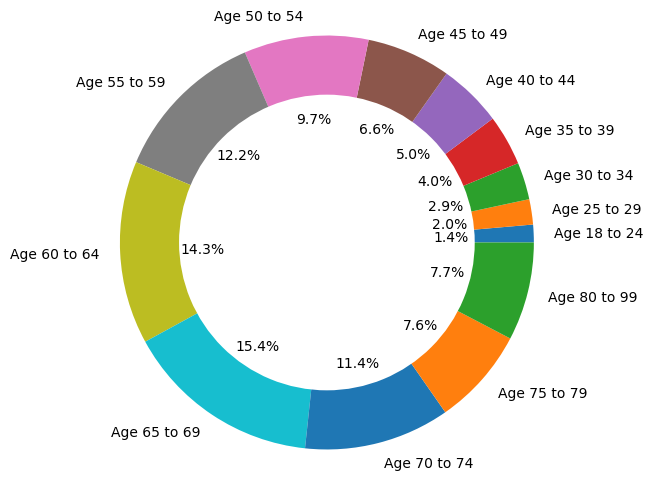

In [19]:
# Storing sum of each categorey in bp.
age = dib['Age'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["Age 18 to 24","Age 25 to 29","Age 30 to 34","Age 35 to 39",
    "Age 40 to 44","Age 45 to 49","Age 50 to 54","Age 55 to 59",
    "Age 60 to 64","Age 65 to 69","Age 70 to 74","Age 75 to 79",
    "Age 80 to 99"]

# Creating pie-chart
plt.pie(age, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

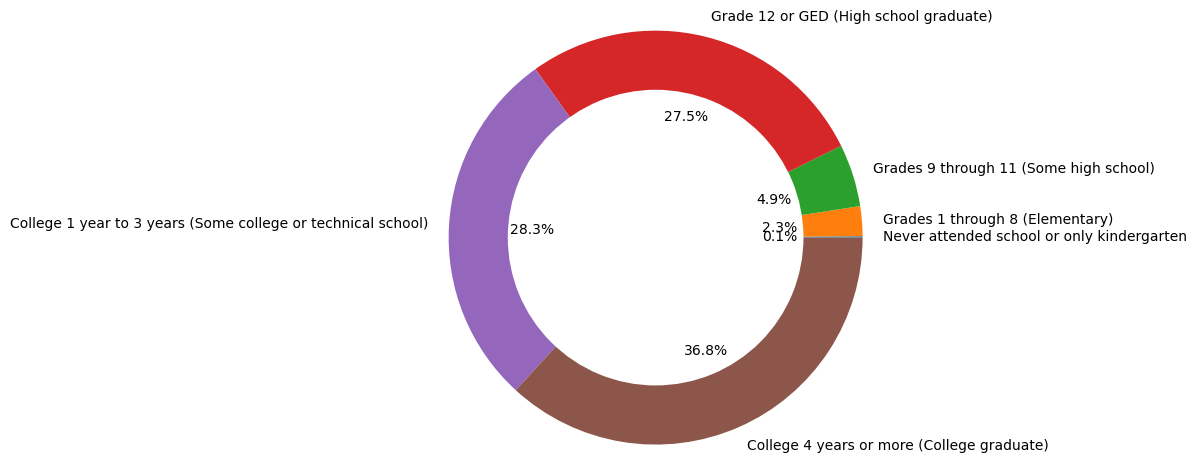

In [20]:
# Storing sum of each categorey in bp.
education = dib['Education'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["Never attended school or only kindergarten",
    "Grades 1 through 8 (Elementary)",
    "Grades 9 through 11 (Some high school)",
    "Grade 12 or GED (High school graduate)",
    "College 1 year to 3 years (Some college or technical school)",
    "College 4 years or more (College graduate)"]

# Creating pie-chart
plt.pie(education, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

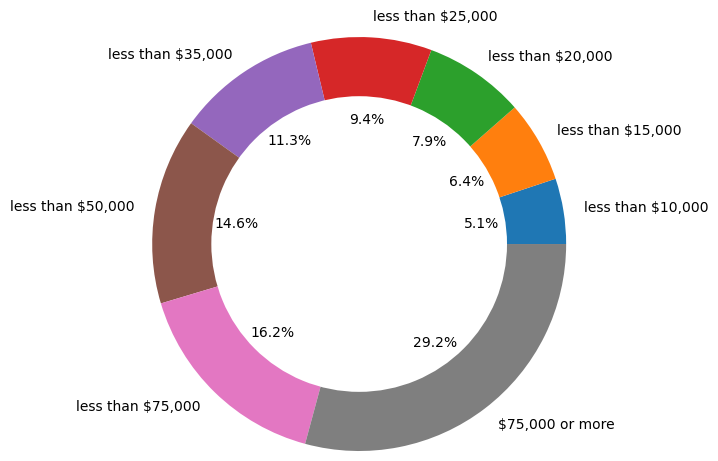

In [21]:
# Storing sum of each categorey in bp.
income = dib['Income'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["less than $10,000","less than $15,000","less than $20,000","less than $25,000","less than $35,000","less than $50,000","less than $75,000","$75,000 or more"]

# Creating pie-chart
plt.pie(income, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

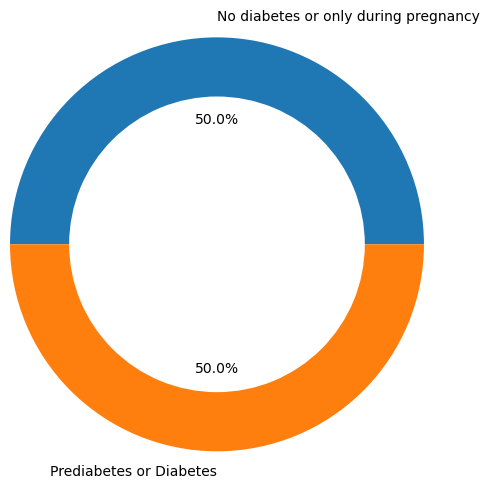

In [22]:
# Storing sum of each categorey in bp.
diabetes = dib['Diabetes_binary'].value_counts().sort_index()

# Creating lables for pie-chart
lb=["No diabetes or only during pregnancy","Prediabetes or Diabetes"]

# Creating pie-chart
plt.pie(diabetes, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

## 2.2 Bivariate and Multivariate

### 2.2.1 Count-plots

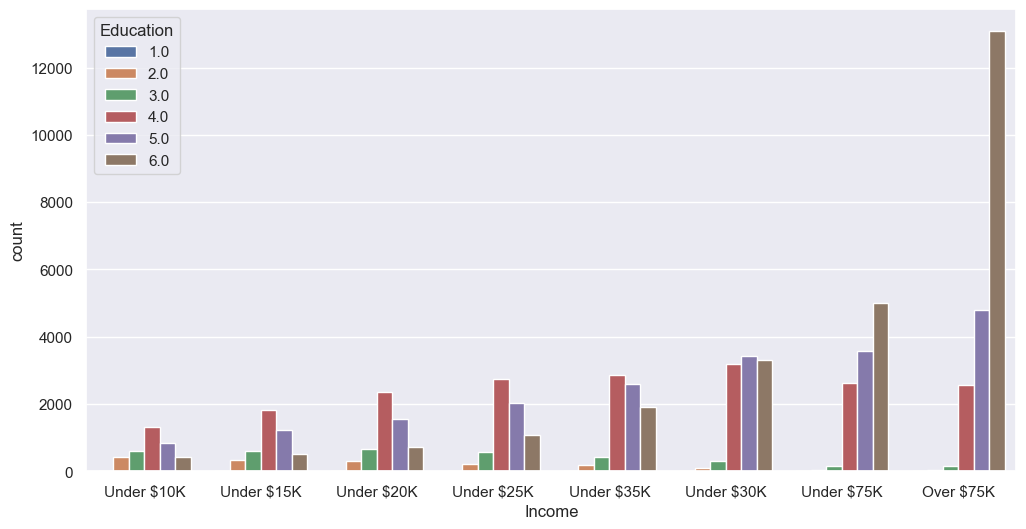

In [23]:
# Ploting countplot to show relation between education and age.
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=dib,x="Income",hue="Education")
plt.xticks(ticks=range(len(dib['Income'].value_counts())),
           labels=['Under $10K', 'Under $15K', 'Under $20K','Under $25K', 'Under $35K', 'Under $30K','Under $75K', 'Over $75K'])
plt.show()

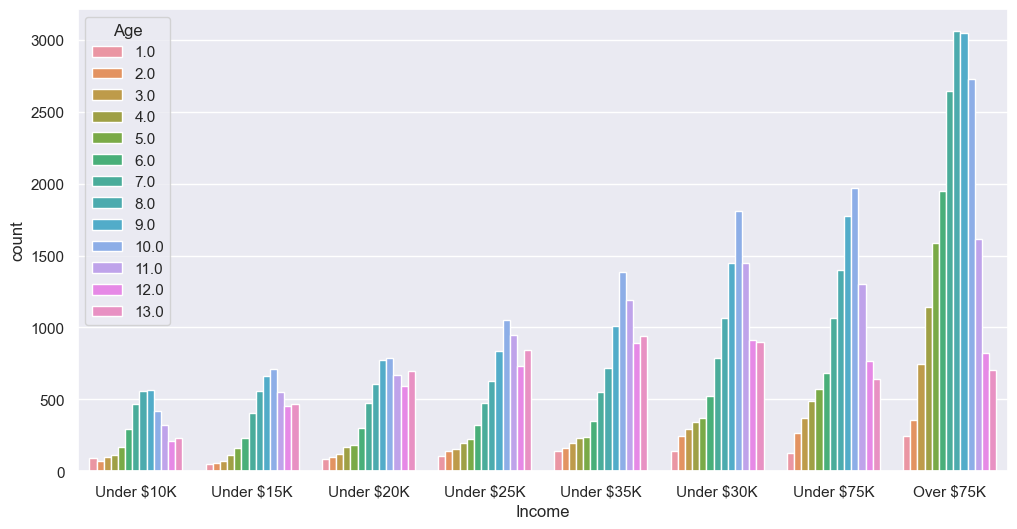

In [24]:
# Ploting countplot to show relation between income and age.
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=dib,x="Income",hue="Age")
plt.xticks(ticks=range(len(dib['Income'].value_counts())),
           labels=['Under $10K', 'Under $15K', 'Under $20K','Under $25K', 'Under $35K', 'Under $30K','Under $75K', 'Over $75K'])
plt.show()

### 2.2.2 Box-plots

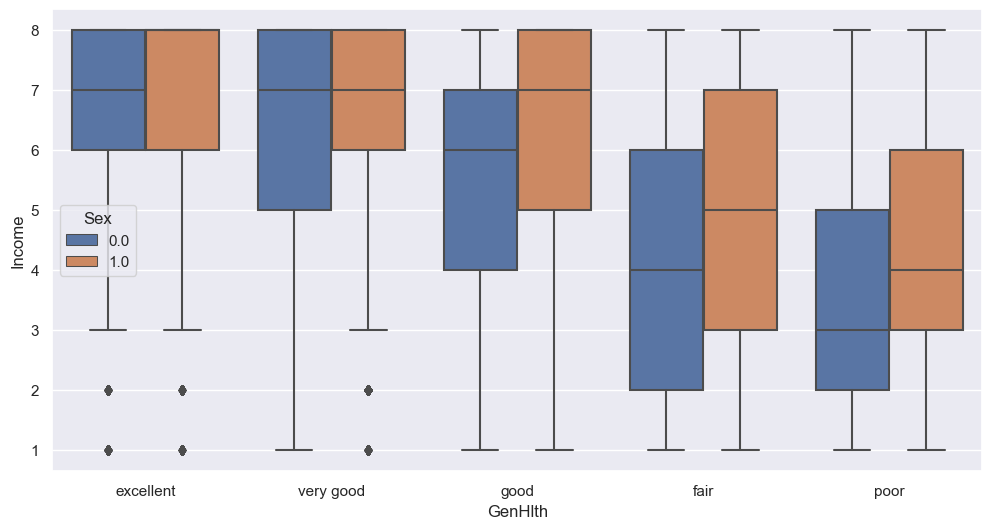

In [25]:
# Ploting boxplot to show relation between general health and income.
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=dib, x="GenHlth", y="Income", hue="Sex")
plt.xticks(ticks=range(len(dib['GenHlth'].value_counts())),
           labels=['excellent','very good','good','fair','poor'])
plt.show()

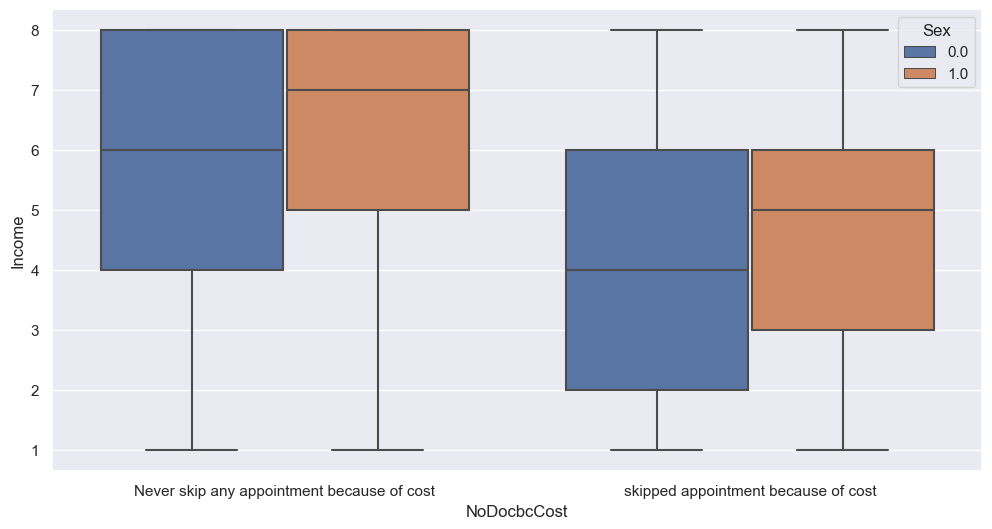

In [26]:
# Ploting boxplot to show relation between skipped dr. appointment because of cost and income.
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=dib, x="NoDocbcCost", y="Income", hue="Sex")
plt.xticks(ticks=range(len(dib['NoDocbcCost'].value_counts())),
           labels=['Never skip any appointment because of cost','skipped appointment because of cost'])
plt.show()

### 2.2.3 Dist-plot

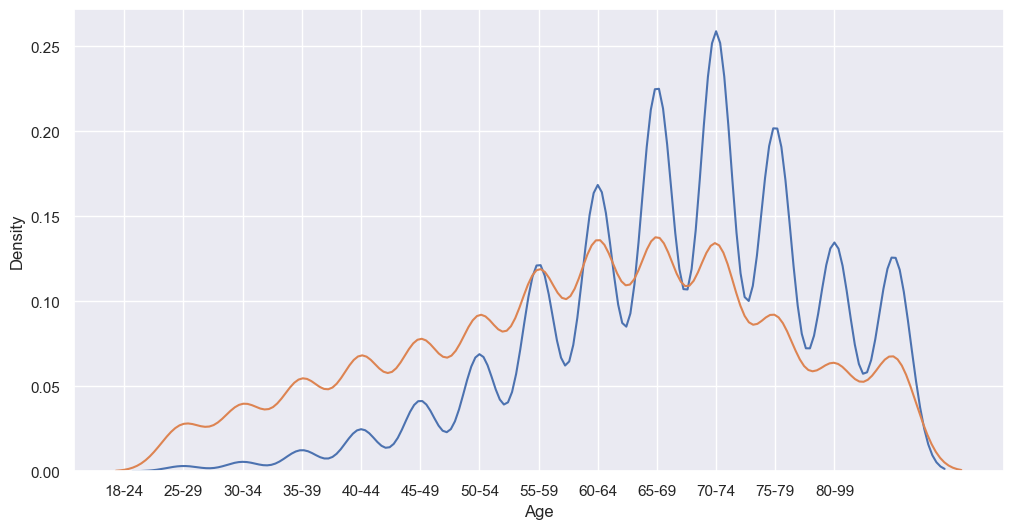

In [27]:
# Ploting distplot to show relation between disesed and non-diseased persons on the basis of their age.
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.distplot(dib[dib['Diabetes_binary']==1]['Age'], hist=False)
sns.distplot(dib[dib['Diabetes_binary']==0]['Age'], hist=False)
plt.xticks(ticks=range(len(dib['Age'].value_counts())),
           labels=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-99'])
plt.show()

<Axes: xlabel='Diabetes_binary', ylabel='Age'>

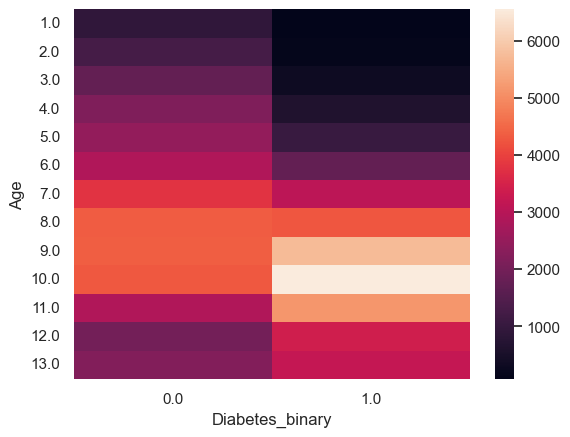

In [28]:
# Ploting boxplot to show relation between age and diseased persons.
sns.heatmap(pd.crosstab(dib['Age'],dib['Diabetes_binary']))

# 3. FEATURE ENGINEERING AND SELECTION

## 3.1 Feature Transformation (CAPPING)

In [29]:
# Changing datatype for better utilization of resources.
dib=dib.astype(int)
dib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int32
 1   HighBP                70692 non-null  int32
 2   HighChol              70692 non-null  int32
 3   CholCheck             70692 non-null  int32
 4   BMI                   70692 non-null  int32
 5   Smoker                70692 non-null  int32
 6   Stroke                70692 non-null  int32
 7   HeartDiseaseorAttack  70692 non-null  int32
 8   PhysActivity          70692 non-null  int32
 9   Fruits                70692 non-null  int32
 10  Veggies               70692 non-null  int32
 11  HvyAlcoholConsump     70692 non-null  int32
 12  AnyHealthcare         70692 non-null  int32
 13  NoDocbcCost           70692 non-null  int32
 14  GenHlth               70692 non-null  int32
 15  MentHlth              70692 non-null  int32
 16  Phys

In [30]:
# Checking skewness of BMI column.
print(dib['BMI'].skew())

1.7191801918140364


In [31]:
# Creating & storing a lower limit value for capping.
lower_limit = dib['BMI'].quantile(0.005)
lower_limit

18.0

In [32]:
# Creating & storing a upper limit value for capping.
upper_limit = dib['BMI'].quantile(0.995)
upper_limit

58.0

### Before Capping

In [33]:
print("BEFORE CAPPING",dib['BMI'].describe())

BEFORE CAPPING count    70692.000000
mean        29.856985
std          7.113954
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64


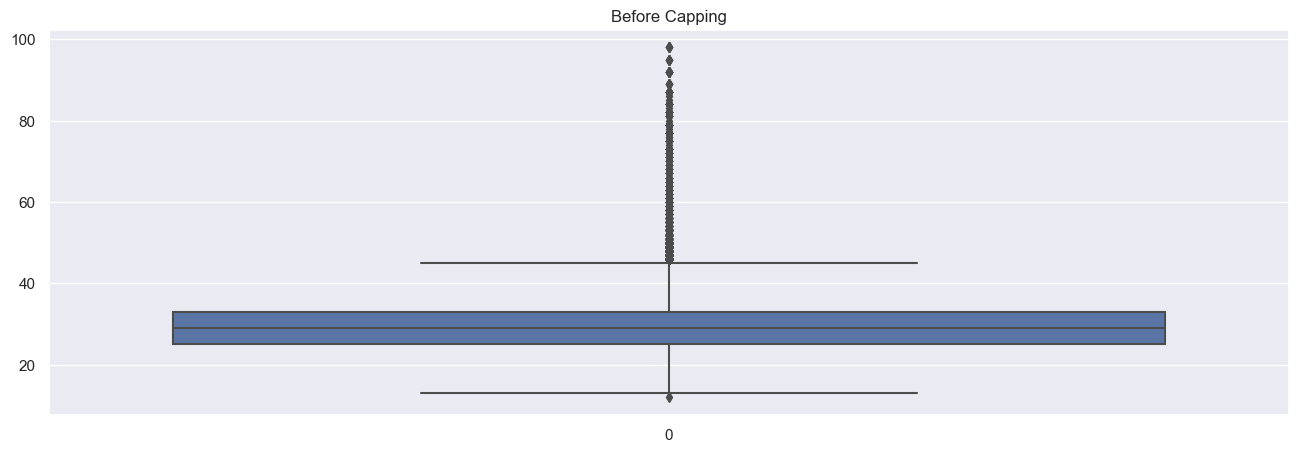

In [34]:
# Ploting boxplot before and after capping.
plt.figure(figsize=(16,5))
sns.boxplot(dib['BMI']).set(title="Before Capping")
plt.show()

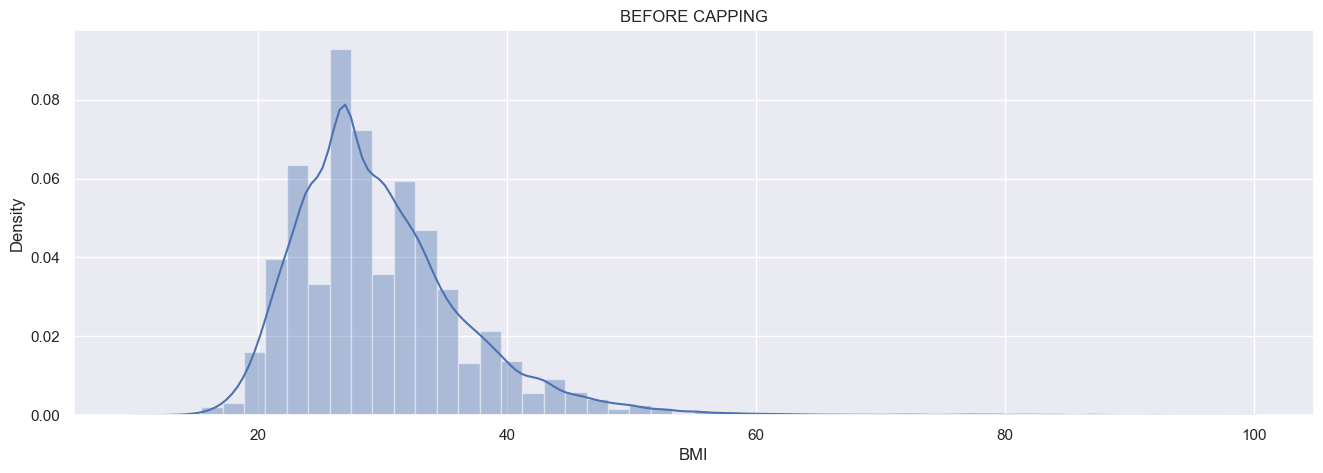

In [35]:
# Ploting boxplot before and after capping.
plt.figure(figsize=(16,5))
sns.distplot(dib['BMI']).set(title="BEFORE CAPPING")
plt.show()

In [36]:
# Capping on the basis of upper and lower limit.
dib['BMI'] = np.where(
    dib['BMI'] > upper_limit,
    31,
    np.where(
        dib['BMI'] < lower_limit,
        24,
        dib['BMI']
    )
)

In [37]:
print("\nAFTER CAPPING",dib['BMI'].describe())


AFTER CAPPING count    70692.000000
mean        29.709656
std          6.474608
min         18.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         58.000000
Name: BMI, dtype: float64


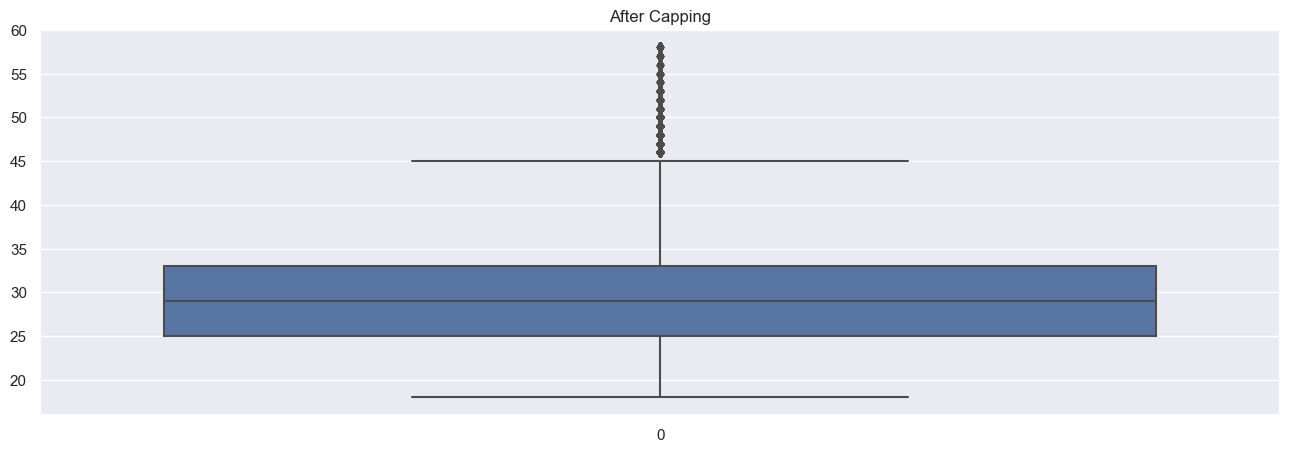

In [38]:
# Ploting boxplot before and after capping.
plt.figure(figsize=(16,5))
sns.boxplot(dib['BMI']).set(title="After Capping")
plt.show()

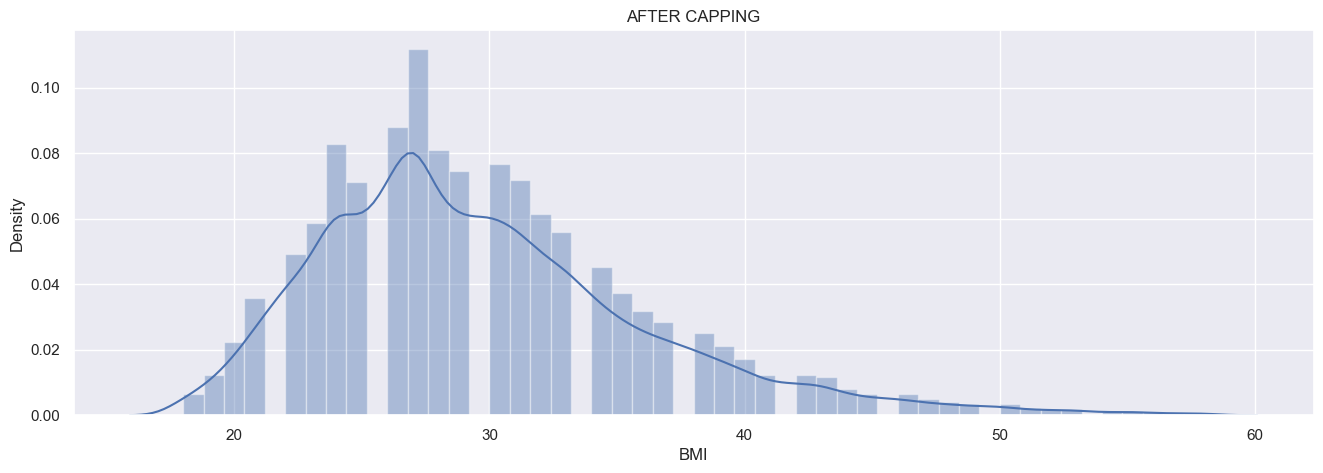

In [39]:
# Ploting boxplot before and after capping.
plt.figure(figsize=(16,5))
sns.distplot(dib['BMI']).set(title="AFTER CAPPING")
plt.show()

## 3.2 Feature Construction (BINNING)

### 3.2.1 BINNING

In [40]:
# Criteria for creating new categories.
bins = [0,18,24,30,40,100]
bins2 = [-1,7,14,21,31]
labels = ['underweight','healthy','overweight','obesity','severeobesity']
labels2 = ['1 Week','2 Weeks','3 Weeks','4 Weeks']

In [41]:
# Creating new features.
dib['BMICategory'] = pd.cut(dib['BMI'],bins,labels=labels)
dib['MentalHlth'] = pd.cut(dib['MentHlth'],bins2,labels=labels2)
dib['PhysicalHlth'] = pd.cut(dib['PhysHlth'],bins2,labels=labels2)
dib.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMICategory,MentalHlth,PhysicalHlth
0,0,1,0,1,26,0,0,0,1,0,...,5,30,0,1,4,6,8,overweight,1 Week,4 Weeks
1,0,1,1,1,26,1,1,0,0,1,...,0,0,0,1,12,6,8,overweight,1 Week,1 Week
2,0,0,0,1,26,0,0,0,1,1,...,0,10,0,1,13,6,8,overweight,1 Week,2 Weeks
3,0,1,1,1,28,1,0,0,1,1,...,0,3,0,1,11,6,8,overweight,1 Week,1 Week
4,0,0,0,1,29,1,0,0,1,1,...,0,0,0,0,8,5,8,overweight,1 Week,1 Week


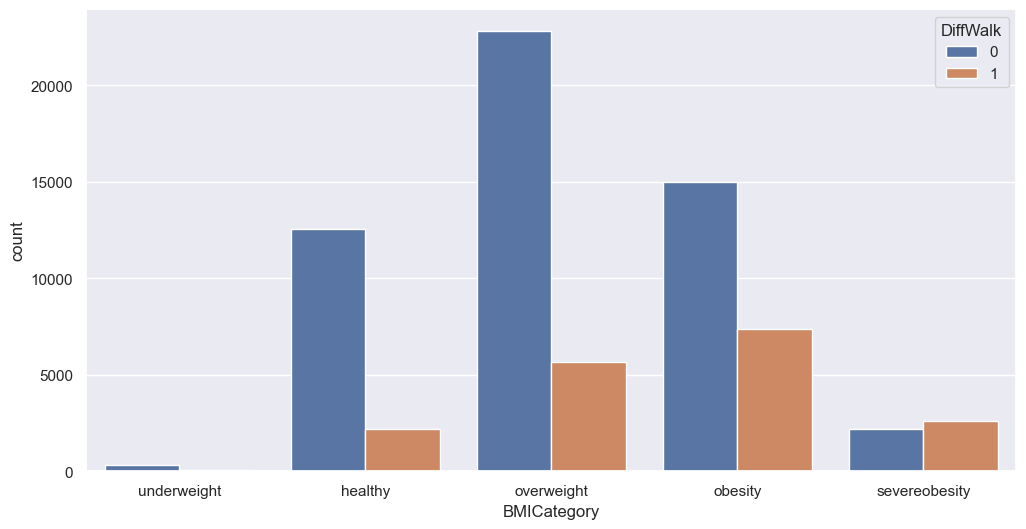

In [42]:
# Ploting countplot to show relation between age and BMI.
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=dib,x="BMICategory",hue="DiffWalk")
plt.show()

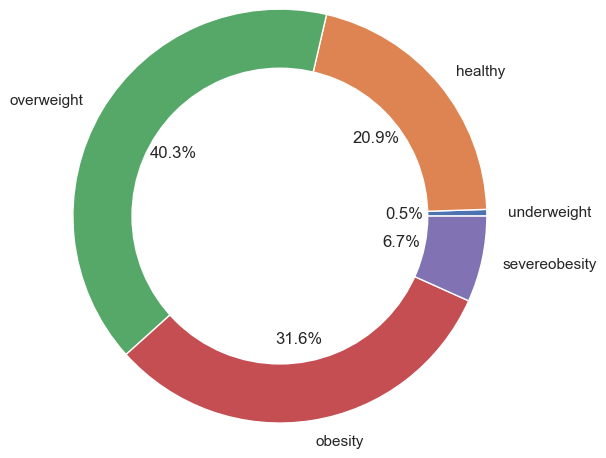

In [43]:
# Storing sum of each categorey in BMI.
bmicat = dib['BMICategory'].value_counts().sort_index()

# Creating lables for pie-chart
lb=['underweight','healthy','overweight','obesity','severeobesity']

# Creating pie-chart
plt.pie(bmicat, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

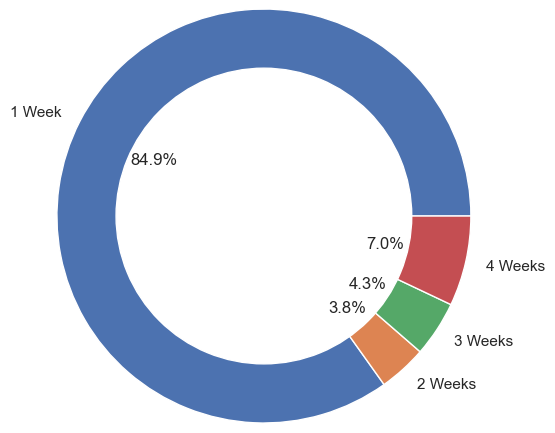

In [44]:
# Storing sum of each categorey in BMI.
ment = dib['MentalHlth'].value_counts().sort_index()

# Creating lables for pie-chart
lb=['1 Week','2 Weeks','3 Weeks','4 Weeks']

# Creating pie-chart
plt.pie(ment, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

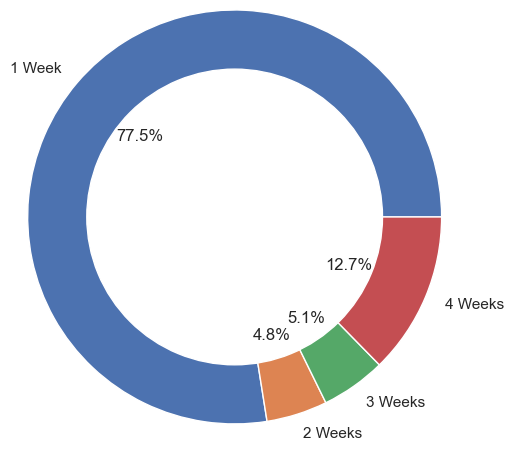

In [45]:
# Storing sum of each categorey in BMI.
phys = dib['PhysicalHlth'].value_counts().sort_index()

# Creating lables for pie-chart
lb=['1 Week','2 Weeks','3 Weeks','4 Weeks']

# Creating pie-chart
plt.pie(phys, radius=1.4, autopct="%0.1f%%", labels=lb)
plt.pie([1], colors="w")

# Ploting pie-chart
plt.show()

### 5.2.2 Feature Encoding

In [46]:
X = dib.iloc[:,1:]
y = dib.iloc[:,0:1]

In [47]:
# Splitting training and testing data.
X_train, X_test, y_train, y_test = train_test_split(dib.drop('Diabetes_binary', axis=1),
                                                    dib['Diabetes_binary'],
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((56553, 24), (14139, 24))

In [48]:
print("BMICategory :", X_train['BMICategory'].nunique())
print("MentalHlth :", X_train['MentalHlth'].nunique())
print("PhysicalHlth :", X_train['PhysicalHlth'].nunique())

BMICategory : 5
MentalHlth : 4
PhysicalHlth : 4


In [49]:
# Columns to be encoded
columns_to_encode = ['BMICategory', 'PhysicalHlth', 'MentalHlth']

# Define the category orders
category_orders = {
    'BMICategory': ['underweight', 'healthy', 'overweight', 'obesity', 'severeobesity'],
    'PhysicalHlth': ['1 Week', '2 Weeks', '3 Weeks', '4 Weeks'],
    'MentalHlth': ['1 Week', '2 Weeks', '3 Weeks', '4 Weeks']
}

# Initialize OrdinalEncoder with category orders
encoder = OrdinalEncoder(categories=[category_orders[column] for column in columns_to_encode], handle_unknown='use_encoded_value', unknown_value=-1)

In [50]:
X_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMICategory,MentalHlth,PhysicalHlth
806,1,1,1,26,1,0,1,0,0,1,...,0,30,1,1,9,4,7,overweight,1 Week,4 Weeks
63025,1,0,1,48,1,0,0,0,1,1,...,0,20,1,1,11,6,5,severeobesity,1 Week,3 Weeks
5820,0,0,1,27,0,0,0,1,0,1,...,0,0,0,1,1,6,7,overweight,1 Week,1 Week
47297,0,1,1,35,0,0,0,1,1,1,...,0,0,1,0,9,4,3,obesity,1 Week,1 Week
1276,1,0,1,24,0,0,0,0,1,1,...,15,0,0,0,8,6,5,healthy,3 Weeks,1 Week


In [51]:
# Fit and transform on X_train
X_train_encoded = encoder.fit_transform(X_train[columns_to_encode])

# Transform on X_test
X_test_encoded = encoder.transform(X_test[columns_to_encode])

# Replace the original columns with the encoded values in X_train and X_test
X_train[columns_to_encode] = X_train_encoded
X_test[columns_to_encode] = X_test_encoded

In [52]:
X_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMICategory,MentalHlth,PhysicalHlth
806,1,1,1,26,1,0,1,0,0,1,...,0,30,1,1,9,4,7,2.0,0.0,3.0
63025,1,0,1,48,1,0,0,0,1,1,...,0,20,1,1,11,6,5,4.0,0.0,2.0
5820,0,0,1,27,0,0,0,1,0,1,...,0,0,0,1,1,6,7,2.0,0.0,0.0
47297,0,1,1,35,0,0,0,1,1,1,...,0,0,1,0,9,4,3,3.0,0.0,0.0
1276,1,0,1,24,0,0,0,0,1,1,...,15,0,0,0,8,6,5,1.0,2.0,0.0


## 3.3 Feature Selection

### 3.3.1 Mutual Information

In [53]:
muinfo = mutual_info_classif(X_train, y_train)
muinfo

array([0.0825159 , 0.04519482, 0.01389498, 0.05515196, 0.00719984,
       0.00908974, 0.02600694, 0.01787673, 0.0069085 , 0.00995208,
       0.0047864 , 0.00669349, 0.        , 0.09181134, 0.00246396,
       0.02761103, 0.04017087, 0.00502229, 0.04678503, 0.01599921,
       0.0285533 , 0.05121044, 0.00336392, 0.01823195])

In [54]:
muinfo = pd.Series(muinfo)
muinfo.index = X_train.columns
muinfo.sort_values(ascending=False)

GenHlth                 0.091811
HighBP                  0.082516
BMI                     0.055152
BMICategory             0.051210
Age                     0.046785
HighChol                0.045195
DiffWalk                0.040171
Income                  0.028553
PhysHlth                0.027611
HeartDiseaseorAttack    0.026007
PhysicalHlth            0.018232
PhysActivity            0.017877
Education               0.015999
CholCheck               0.013895
Veggies                 0.009952
Stroke                  0.009090
Smoker                  0.007200
Fruits                  0.006909
AnyHealthcare           0.006693
Sex                     0.005022
HvyAlcoholConsump       0.004786
MentalHlth              0.003364
MentHlth                0.002464
NoDocbcCost             0.000000
dtype: float64

<Axes: >

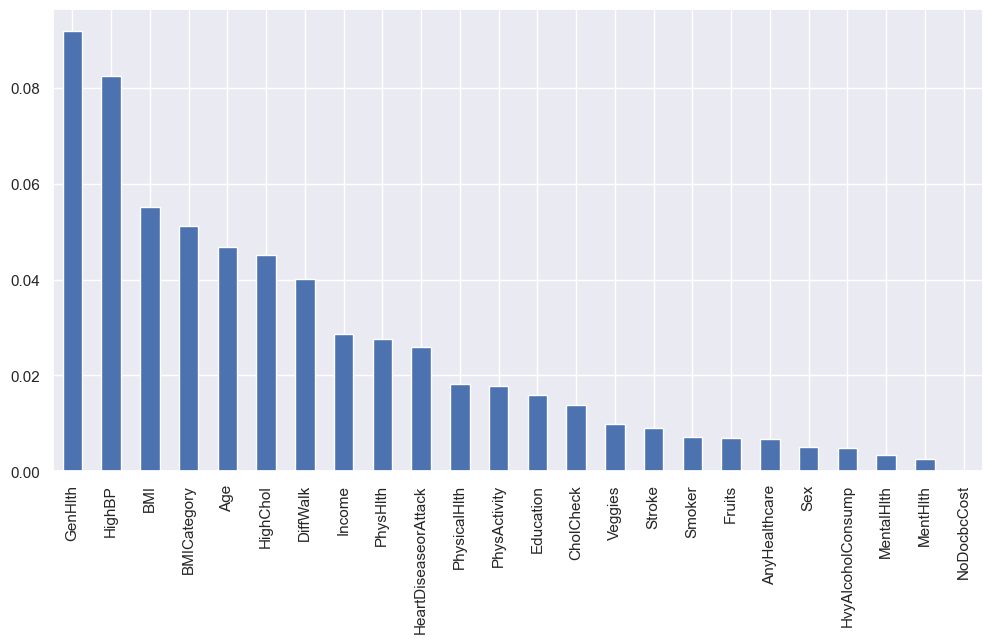

In [55]:
muinfo.sort_values(ascending=False).plot.bar(figsize=(12,6))

In [56]:
# start = time.time()
# for i in range (1,25):
    
#     sel_col = SelectKBest(mutual_info_classif, k=i)
#     sel_col.fit(X_train, y_train)
#     X_train_info = X_train[X_train.columns[sel_col.get_support()]]
#     lr = LogisticRegression()
#     lr.fit(X_train_info,y_train)
#     X_test_info = X_test[X_train_info.columns]
#     y_pred = lr.predict(X_test_info)
#     print(f"Number of features: {i}, Accuracy: {accuracy_score(y_test, y_pred)}")
# print(time.time() - start)

In [57]:
sel_col = SelectKBest(mutual_info_classif, k=7)
sel_col.fit(X_train, y_train)
X_train_info = X_train[X_train.columns[sel_col.get_support()]]

In [58]:
lr = LogisticRegression()
lr.fit(X_train_info,y_train)

LogisticRegression()

In [59]:
X_test_info = X_test[X_train_info.columns]
y_pred = lr.predict(X_test_info)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7457387368272155


### 3.3.2 Chi Squared Test

In [60]:
chisq = chi2(X_train,y_train)
chisq

(array([3.54897504e+03, 2.23993332e+03, 1.87612635e+01, 7.84502329e+03,
        2.03398898e+02, 8.19135087e+02, 2.18083113e+03, 4.13176687e+02,
        6.06768148e+01, 7.40485941e+01, 4.78678441e+02, 1.04615759e+00,
        8.81565221e+01, 4.08452241e+03, 7.61014930e+03, 4.39651793e+04,
        3.13775527e+03, 5.47920947e+01, 4.17345594e+03, 3.43531273e+02,
        2.32636068e+03, 1.87549064e+03, 9.72005547e+02, 4.84887830e+03]),
 array([0.00000000e+000, 0.00000000e+000, 1.48145781e-005, 0.00000000e+000,
        3.78570490e-046, 3.73086581e-180, 0.00000000e+000, 7.45846833e-092,
        6.72576414e-015, 7.62175036e-018, 4.14297926e-106, 3.06393690e-001,
        6.04746471e-021, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.33978601e-013, 0.00000000e+000, 1.08600940e-076,
        0.00000000e+000, 0.00000000e+000, 2.18442578e-213, 0.00000000e+000]))

In [61]:
chisq = pd.Series(chisq)

In [62]:
# start = time.time()
# for i in range (1,25):  
#     chisq = SelectKBest(chi2, k=i)
#     chisq.fit(X_train, y_train)
#     X_train_chisq = X_train[X_train.columns[chisq.get_support()]]
#     lr = LogisticRegression()
#     lr.fit(X_train_chisq,y_train)
#     X_test_chisq = X_test[X_train_chisq.columns]
#     y_pred = lr.predict(X_test_chisq)
#     print(f"Number of features: {i}, Accuracy: {accuracy_score(y_test, y_pred)}")
# print(time.time() - start)

In [63]:
chisq = SelectKBest(chi2, k=7)
chisq.fit(X_train, y_train)
X_train_chisq = X_train[X_train.columns[chisq.get_support()]]

In [64]:
lr = LogisticRegression()
lr.fit(X_train_chisq,y_train)

LogisticRegression()

In [65]:
X_test_chisq = X_test[X_train_chisq.columns]
y_pred = lr.predict(X_test_chisq)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7405049862083598


## 3.4 Feature Extraction

### 3.3.1 Co-relation Maps

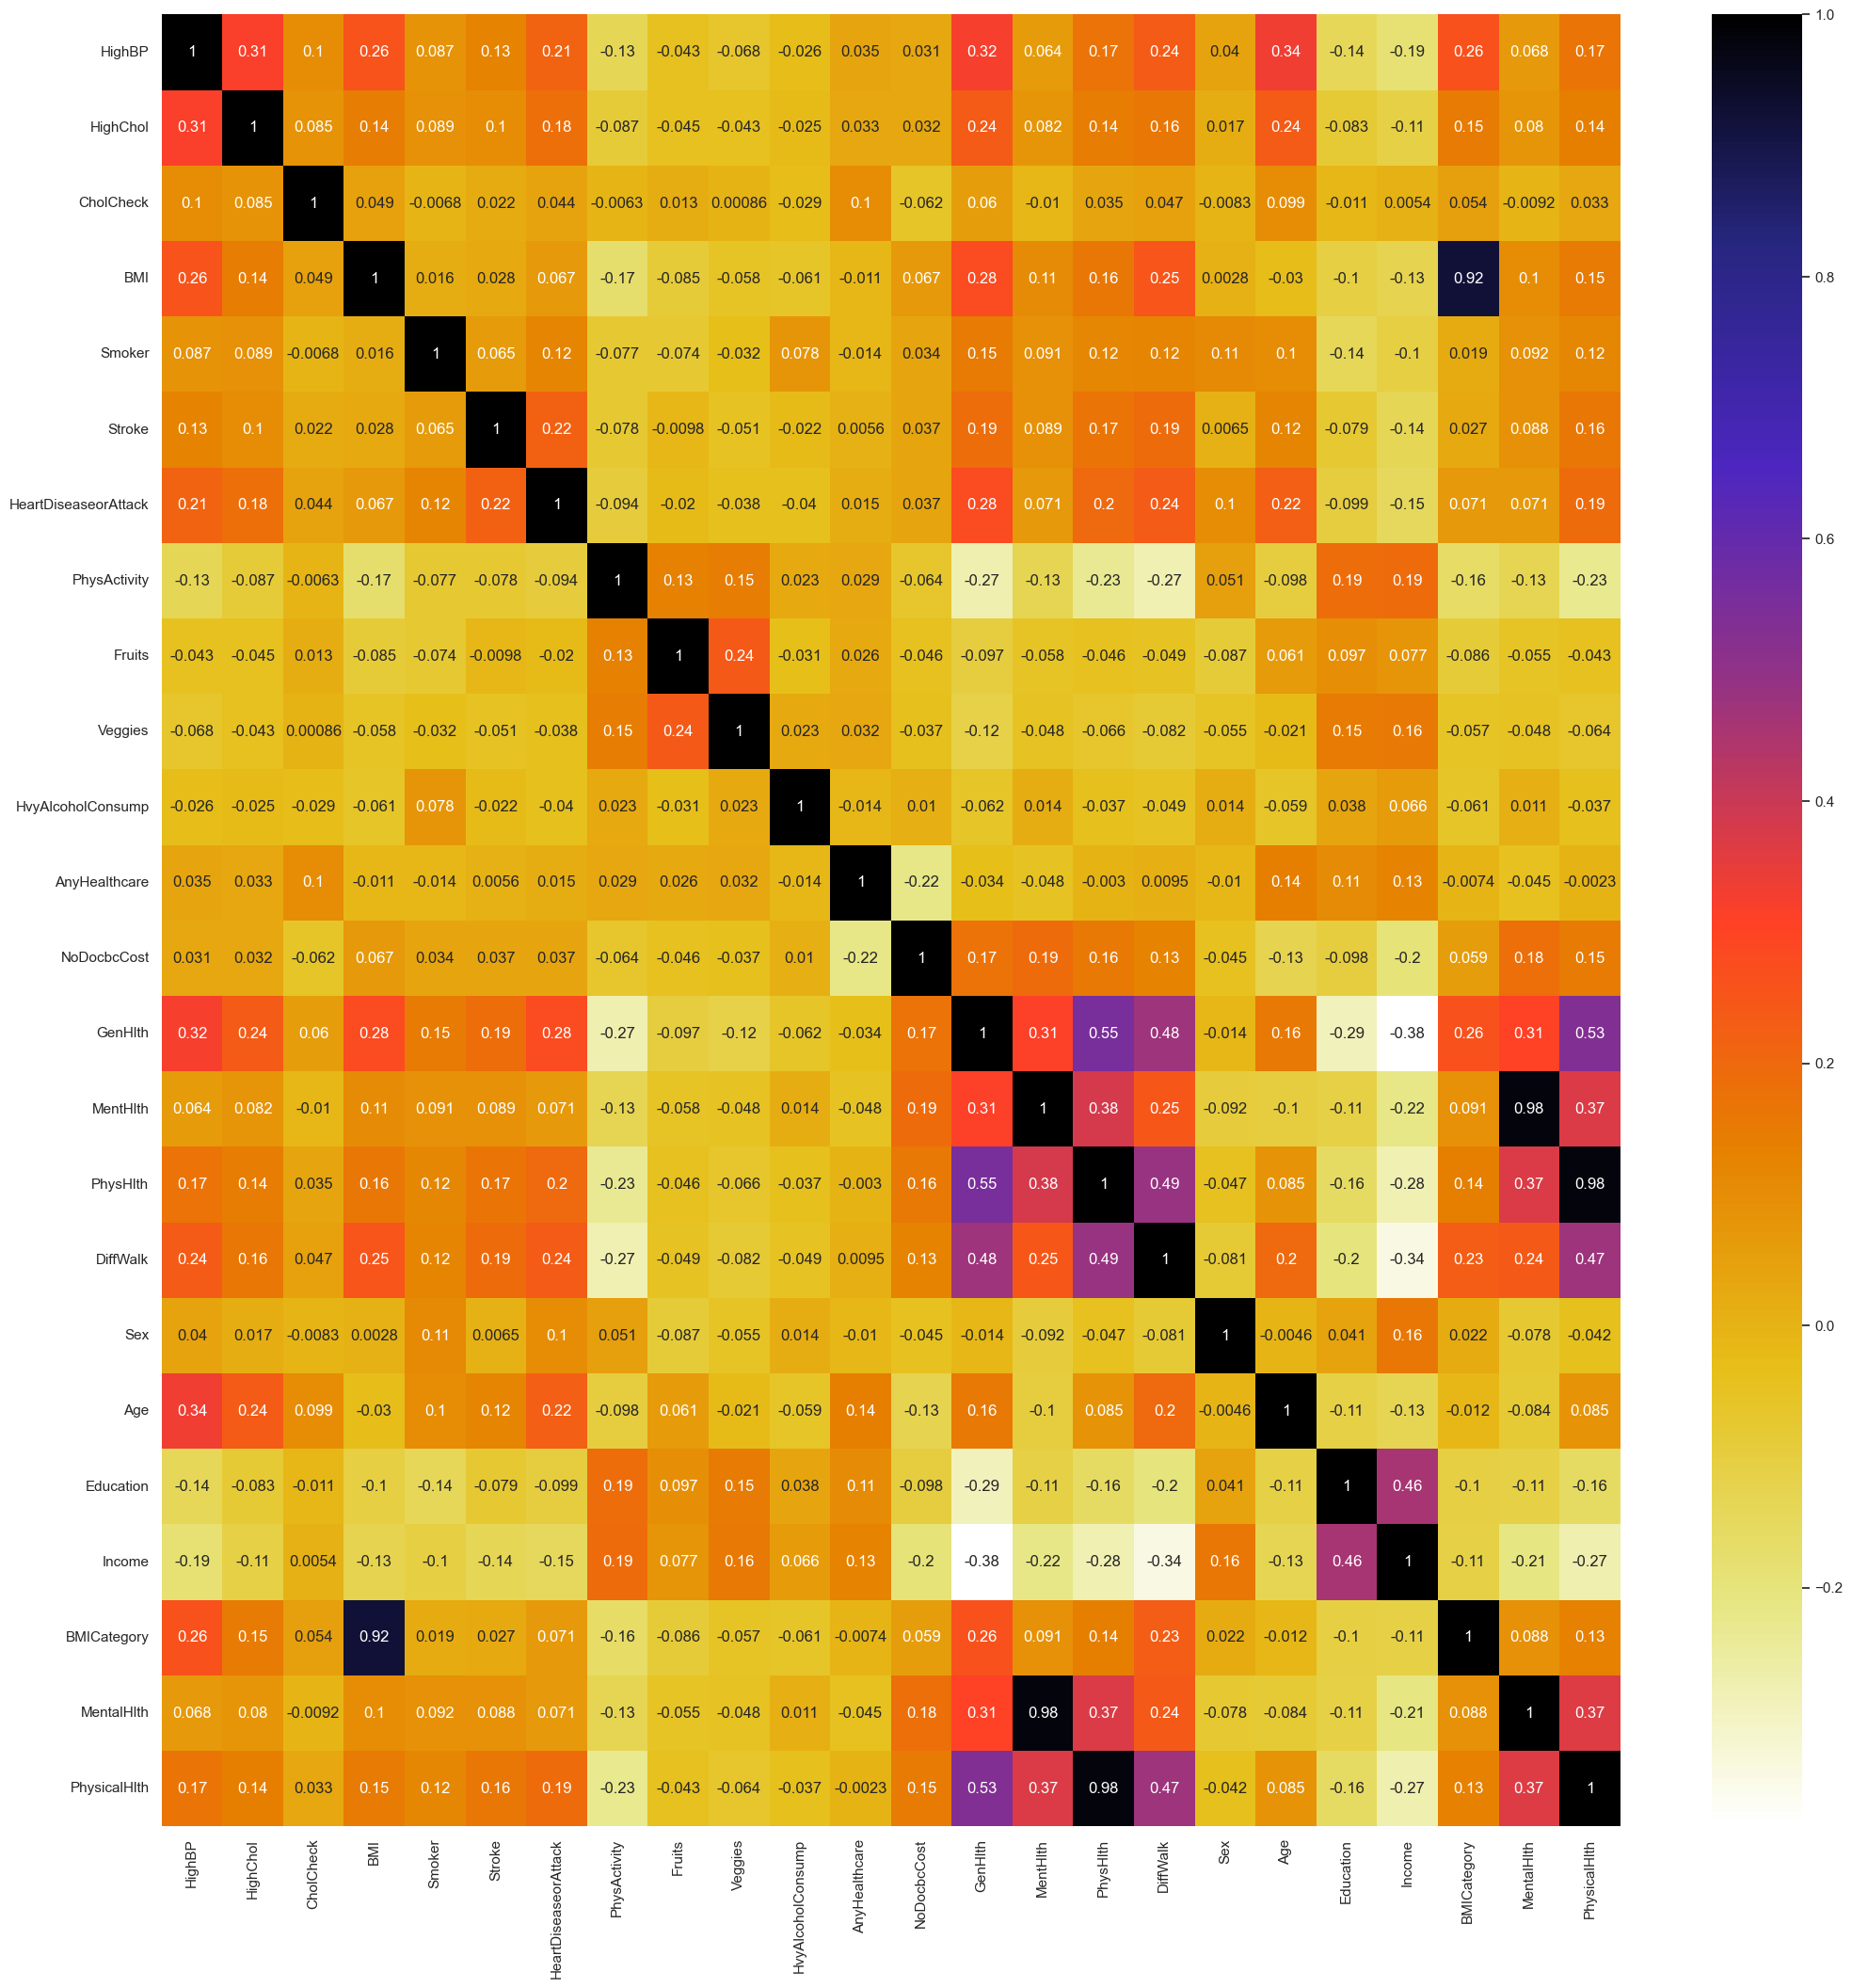

In [66]:
plt.figure(figsize=(25,25))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [67]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [68]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

3

In [69]:
corr_features

{'BMICategory', 'MentalHlth', 'PhysicalHlth'}

In [70]:
X_train = X_train.drop(corr_features, axis=1)
X_test = X_test.drop(corr_features, axis=1)

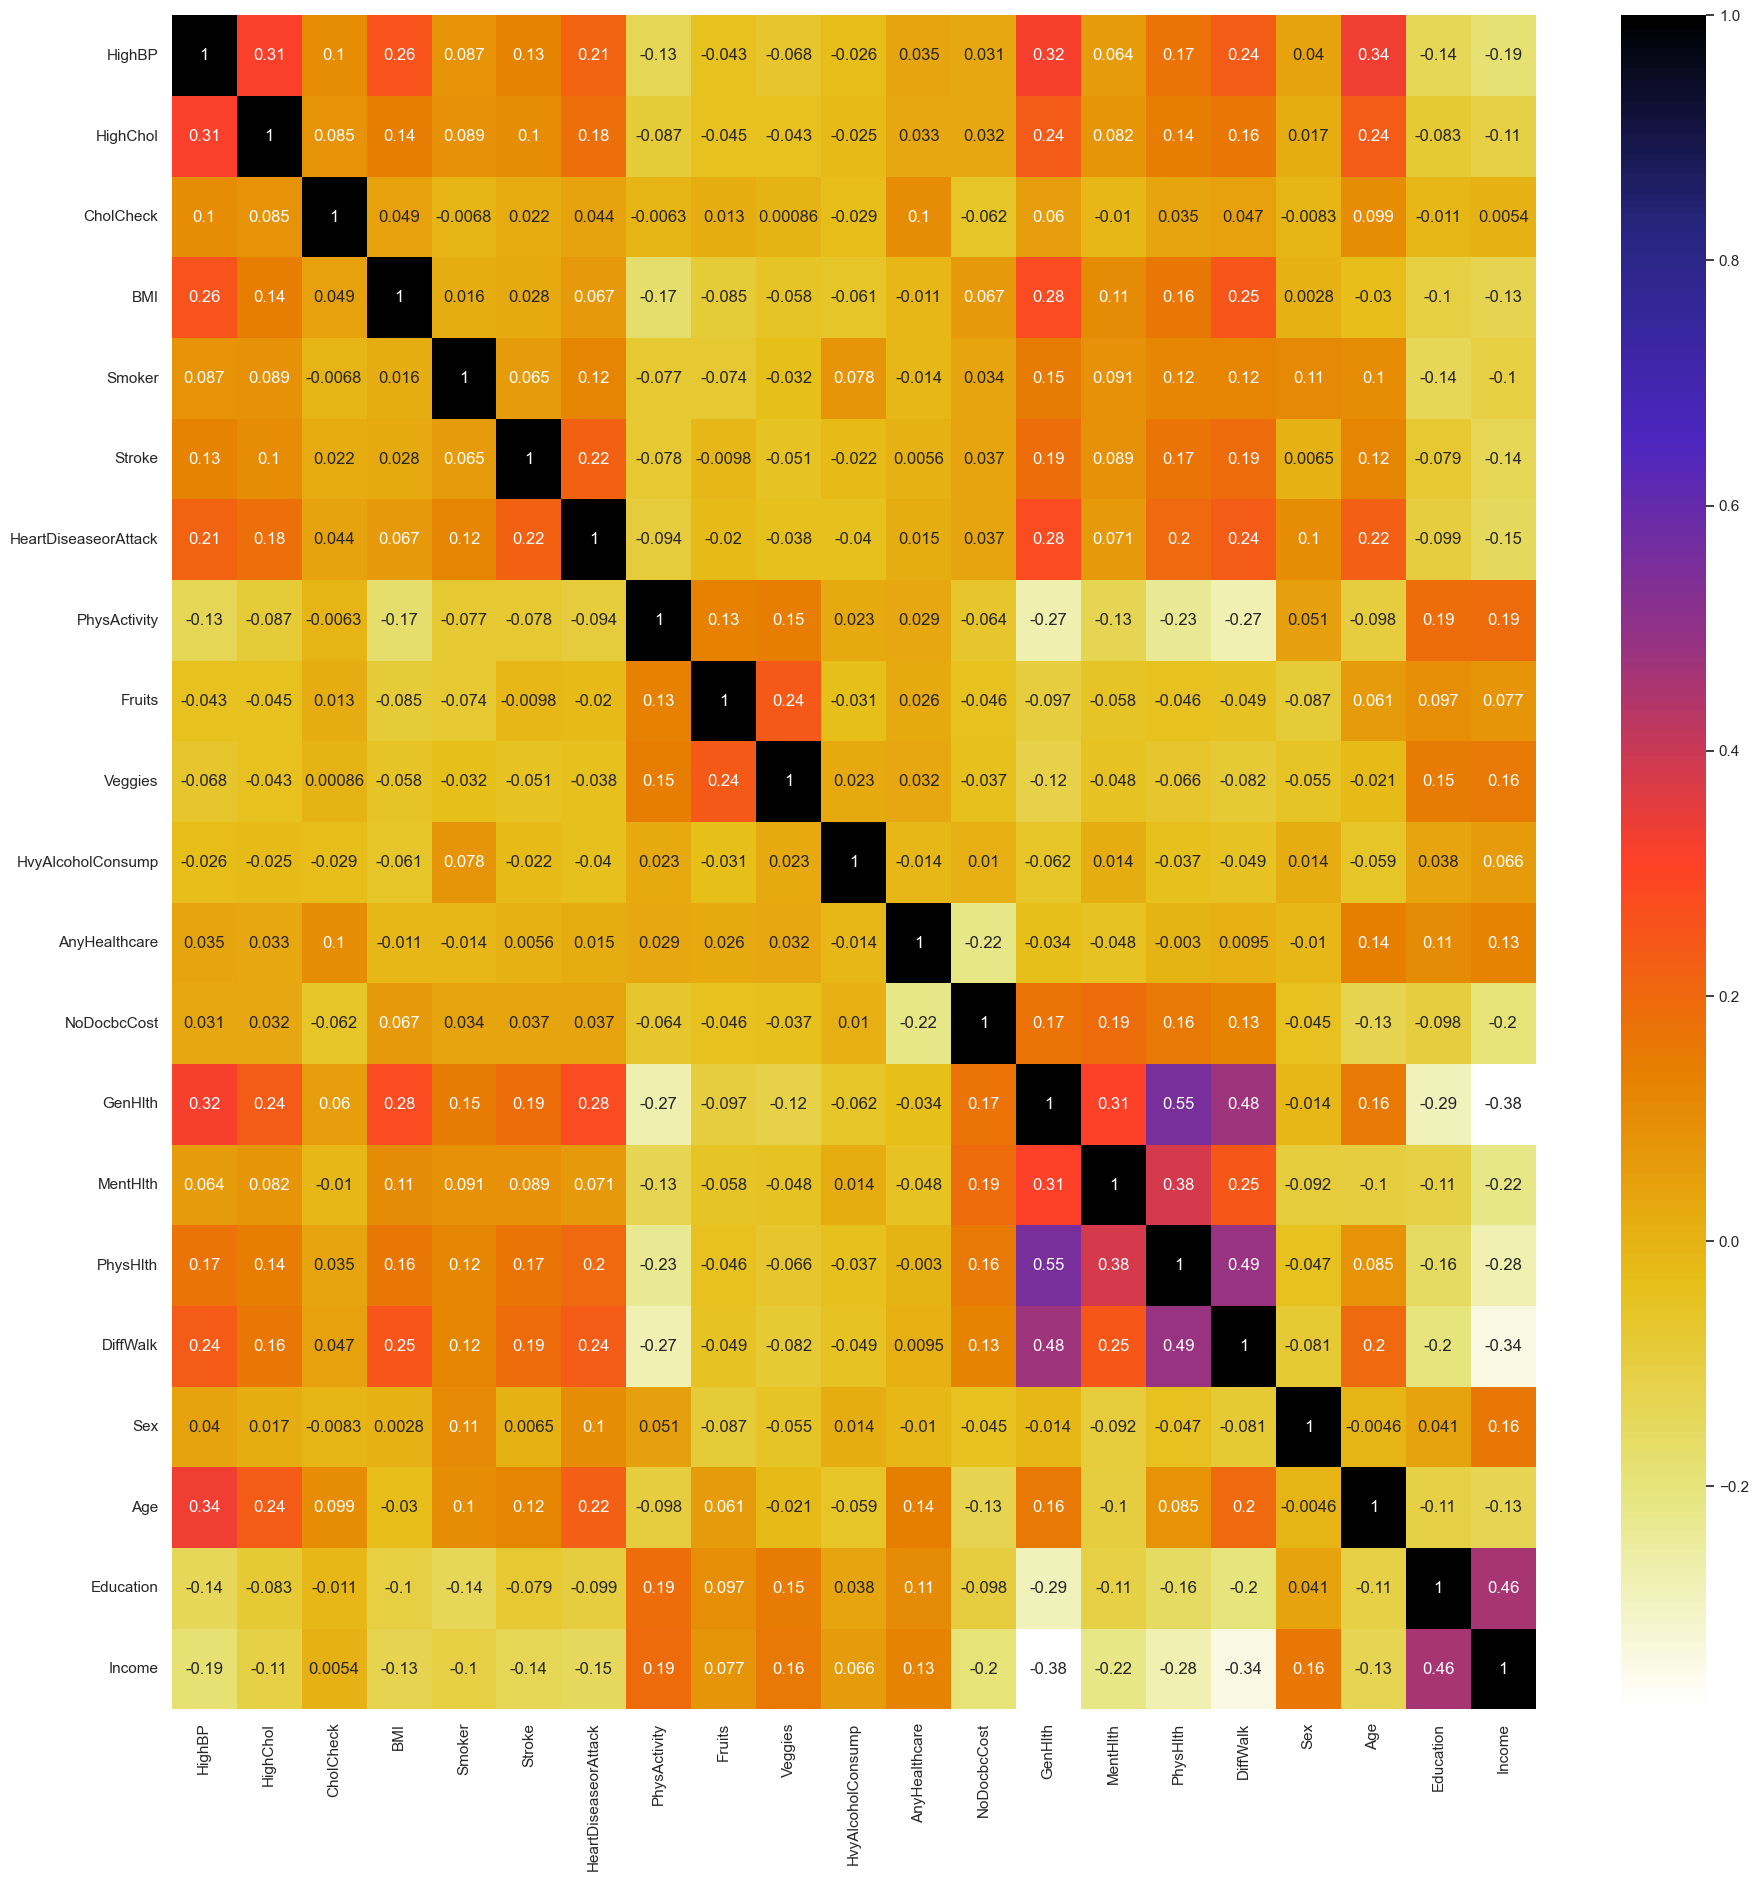

In [71]:
plt.figure(figsize=(22,22))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### 3.4.1 Without PCA

In [72]:
lr = LogisticRegression()

In [73]:
lr.fit(X_train,y_train)

LogisticRegression()

In [74]:
import time
start = time.time()
y_pred = lr.predict(X_test)
print(time.time() - start)

0.007368564605712891


In [75]:
accuracy_score(y_test,y_pred)

0.7437583987552161

In [76]:
confusion_matrix(y_test,y_pred)

array([[4979, 1953],
       [1670, 5537]], dtype=int64)

### 5.4.2 PCA with sklearn

In [77]:
# 1. Apply Standard Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
for i in range (1,22):
    pca = PCA(n_components=i)

    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    lr.fit(X_train_pca,y_train)
    
    y_pred = lr.predict(X_test_pca)
    print("Logistic Regression accuracy with",i,"feature :",accuracy_score(y_test,y_pred))

Logistic Regression accuracy with 1 feature : 0.7045052691137987
Logistic Regression accuracy with 2 feature : 0.7297545795317915
Logistic Regression accuracy with 3 feature : 0.7304618431289341
Logistic Regression accuracy with 4 feature : 0.7320885494023622
Logistic Regression accuracy with 5 feature : 0.7356955937477898
Logistic Regression accuracy with 6 feature : 0.7423438715609307
Logistic Regression accuracy with 7 feature : 0.743475493316359
Logistic Regression accuracy with 8 feature : 0.7433340405969304
Logistic Regression accuracy with 9 feature : 0.7437583987552161
Logistic Regression accuracy with 10 feature : 0.7438291251149304
Logistic Regression accuracy with 11 feature : 0.7448192941509301
Logistic Regression accuracy with 12 feature : 0.7449607468703586
Logistic Regression accuracy with 13 feature : 0.7446071150717872
Logistic Regression accuracy with 14 feature : 0.7450314732300728
Logistic Regression accuracy with 15 feature : 0.7447485677912158
Logistic Regression 

In [79]:
# PCA
pca = PCA(n_components=6)

In [80]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [81]:
lr.fit(X_train_pca,y_train)

LogisticRegression()

In [82]:
y_pred = lr.predict(X_test_pca)
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 0.743192587877502


# 6. MODEL TRAINING, EVALUATION AND SELECTION

In [83]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Testing set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model Preformance')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')

Logistic Regression
Model Preformance
- Accuracy: 0.7499
- F1 score: 0.7498
- Precision: 0.7468
- Recall: 0.7706
- Roc Auc Score: 0.7495


Decision Tree
Model Preformance
- Accuracy: 0.6550
- F1 score: 0.6550
- Precision: 0.6629
- Recall: 0.6574
- Roc Auc Score: 0.6549


Random Forest
Model Preformance
- Accuracy: 0.7375
- F1 score: 0.7370
- Precision: 0.7277
- Recall: 0.7748
- Roc Auc Score: 0.7367




In [84]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_info, y_train)
    
    y_train_pred = model.predict(X_train_info)
    y_test_pred = model.predict(X_test_info)
    
    # Testing set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model Preformance')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')

Logistic Regression
Model Preformance
- Accuracy: 0.7457
- F1 score: 0.7456
- Precision: 0.7438
- Recall: 0.7645
- Roc Auc Score: 0.7454


Decision Tree
Model Preformance
- Accuracy: 0.7124
- F1 score: 0.7124
- Precision: 0.7212
- Recall: 0.7103
- Roc Auc Score: 0.7124


Random Forest
Model Preformance
- Accuracy: 0.7170
- F1 score: 0.7168
- Precision: 0.7140
- Recall: 0.7422
- Roc Auc Score: 0.7165




# 7. MODEL DEPLOYMENT

In [85]:
dib = pd.read_csv('binary.csv')
dib.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [86]:
# Splitting training and testing data.
X_train, X_test, y_train, y_test = train_test_split(dib.drop('Diabetes_binary', axis=1),
                                                    dib['Diabetes_binary'],
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((56553, 21), (14139, 21))

In [87]:
# Feature selection
muinfo = SelectKBest(mutual_info_classif, k=7)
muinfo.fit(X_train, y_train)
X_train = X_train[X_train.columns[muinfo.get_support()]]
X_train.head(2)

,HighBP,HighChol,BMI,GenHlth,DiffWalk,Age,Income
806,1.0,1.0,26.0,5.0,1.0,9.0,7.0
63025,1.0,0.0,48.0,2.0,1.0,11.0,5.0


In [88]:
# Feature scaling
trf1 = ColumnTransformer([
    ('scale',StandardScaler(),[2])
], remainder='passthrough')

In [89]:
# Model Training
trf2 = LogisticRegression()

In [90]:
# Creating Pipeline
pipe = Pipeline([
    ('StandardScaler',trf1),
    ('LigisticRegression',trf2)
])

In [91]:
# Implementing pipeline
pipe.fit(X_train,y_train)

Pipeline(steps=[('StandardScaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  [2])])),
                ('LigisticRegression', LogisticRegression())])

In [92]:
# Making predictions
y_pred = pipe.predict(X_test)

In [93]:
# Accuracy of pipe
accuracy_score(y_test,y_pred)

0.7453143786689299

## Cross Validation

In [94]:
# Cross validation
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.7430198250711086

## Exporting the Pipeline

In [95]:
# Export
pickle.dump(pipe,open('pipe.pkl','wb'))

# X---X---END---X---X